In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, MaxPooling2D, Reshape, Flatten
from keras.utils import to_categorical
import time
from sklearn.model_selection import train_test_split

In [2]:
BATCH_SIZE = 256
NUM_EPOCHS = 100
RANDOM_SEED = 100

In [3]:
data = pd.read_csv("data/train.csv")
X = data.values[:,1:786]
y = np.expand_dims(data.values[:,0], axis=1)
y = to_categorical(y, num_classes=10)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=RANDOM_SEED)

In [19]:
np.random.seed(RANDOM_SEED)
input_dim = X_train.shape[1]

def get_vanilla_model():
    model = Sequential()
    model.add(Dense(units=20, activation='relu', input_dim=input_dim,name='First-layer' ))
    model.add(Dense(units=20, activation='relu', name='Second-layer' ))
    model.add(Dense(units=20, activation='relu', name='Third-layer' ))
    model.add(Dense(10, activation='sigmoid',name='Output-layer'))
    model.compile(loss='categorical_crossentropy',
            optimizer=Adam(),
            metrics=['accuracy'])
    
    return model

def get_cnn_model():
    model = Sequential()
    model.add(Reshape((28, 28, 1,), input_shape=(784,),name='Reshape'))
    model.add(Conv2D(filters=3, kernel_size=3, activation='relu',input_shape=(28, 28, 1),name='conv_1'))
    model.add(MaxPooling2D(pool_size=2,name='pool_1'))
    model.add(Conv2D(filters=8, kernel_size=3, activation='relu',name='conv_2'))
    model.add(MaxPooling2D(pool_size=2,name='pool_2'))
    model.add(Flatten())
    model.add(Dense(units=20, activation='relu',name='dense_1'))
    model.add(Dense(10, activation='sigmoid',name='output'))
    model.compile(loss='categorical_crossentropy',
            optimizer=Adam(),
            metrics=['accuracy'])
    
    return model
    
model = get_cnn_model()

In [20]:
start_time = time.time()
history = model.fit(X_train, y_train, epochs=NUM_EPOCHS, verbose=1, batch_size=BATCH_SIZE)
elapsed_time = time.time() - start_time
train_loss_and_metrics = model.evaluate(X_train, y_train)
test_loss_and_metrics = model.evaluate(X_test, y_test)

Epoch 1/100
37800/37800 [==============================] - 4s 112us/step - loss: 2.4295 - acc: 0.0986
Epoch 2/100
37800/37800 [==============================] - 4s 97us/step - loss: 2.2299 - acc: 0.0981
Epoch 3/100
37800/37800 [==============================] - 4s 100us/step - loss: 2.2028 - acc: 0.0984
Epoch 4/100
37800/37800 [==============================] - 4s 99us/step - loss: 2.1853 - acc: 0.1056
Epoch 5/100
37800/37800 [==============================] - 4s 99us/step - loss: 2.1226 - acc: 0.2232
Epoch 6/100
37800/37800 [==============================] - 4s 101us/step - loss: 2.0523 - acc: 0.2774
Epoch 7/100
37800/37800 [==============================] - 4s 102us/step - loss: 1.9823 - acc: 0.3259
Epoch 8/100
37800/37800 [==============================] - 4s 101us/step - loss: 1.9089 - acc: 0.3604
Epoch 9/100
37800/37800 [==============================] - 4s 95us/step - loss: 1.8305 - acc: 0.3627
Epoch 10/100
37800/37800 [==============================] - 4s 104us/step - loss: 1.66

37800/37800 [==============================] - 4s 99us/step - loss: 0.0194 - acc: 0.9930
Epoch 81/100
37800/37800 [==============================] - 4s 98us/step - loss: 0.0159 - acc: 0.9945
Epoch 82/100
37800/37800 [==============================] - 4s 98us/step - loss: 0.0153 - acc: 0.9944
Epoch 83/100
37800/37800 [==============================] - 4s 97us/step - loss: 0.0131 - acc: 0.9954
Epoch 84/100
37800/37800 [==============================] - 4s 96us/step - loss: 0.0116 - acc: 0.9957
Epoch 85/100
37800/37800 [==============================] - 4s 97us/step - loss: 0.0193 - acc: 0.9934
Epoch 86/100
37800/37800 [==============================] - 4s 99us/step - loss: 0.0151 - acc: 0.9945
Epoch 87/100
37800/37800 [==============================] - 4s 98us/step - loss: 0.0126 - acc: 0.9954
Epoch 88/100
37800/37800 [==============================] - 4s 99us/step - loss: 0.0134 - acc: 0.9948
Epoch 89/100
37800/37800 [==============================] - 4s 97us/step - loss: 0.0147 - acc: 

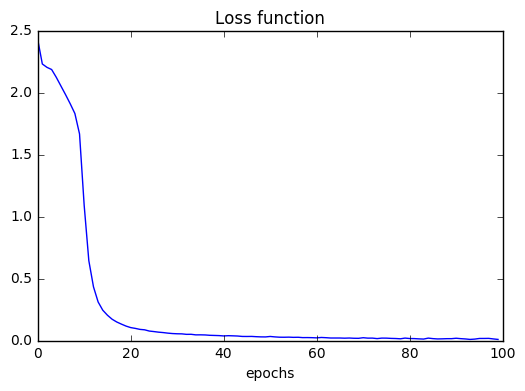


Train Accuracy:  0.995661375661
Test Accuracy:  0.979523809524
Training time:  378.06620812416077  seconds


In [21]:
plt.plot(history.history['loss'])
plt.title("Loss function")
plt.xlabel("epochs")
plt.show()
print("\nTrain Accuracy: ",train_loss_and_metrics[1])
print("Test Accuracy: ",test_loss_and_metrics[1])
print("Training time: ",elapsed_time, " seconds")

In [22]:
from keras.utils import plot_model
plot_model(model, to_file='images/model.png',show_shapes=True,rankdir='LR')

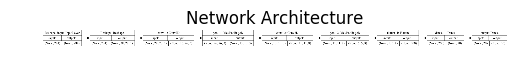

In [23]:
import matplotlib.image as mpimg
img=mpimg.imread('images/model.png')
fig, ax = plt.subplots()
ax.axis('off')
imgplot = plt.imshow(img)
plt.title("Network Architecture")
plt.show()

In [24]:
predictions = np.expand_dims(model.predict_classes(X_test), axis=1)
correct_labels = np.expand_dims(np.argmax(y_test, axis=1), axis=1)
wrongly_classified_indices = predictions != correct_labels
wrongly_classified_indices = [x[0] for x in wrongly_classified_indices]

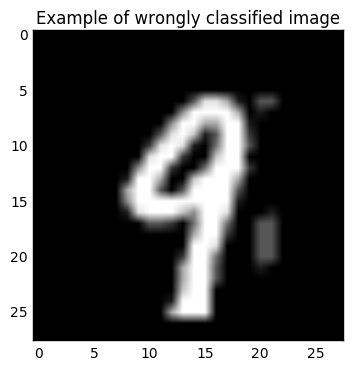

Predicted label:  4
Correct label:  9


In [25]:
num_wrongly_classified = np.sum(wrongly_classified_indices)
sample_wrong_index = np.random.choice(num_wrongly_classified)
wrongly_classified_example = X_test[wrongly_classified_indices][sample_wrong_index]
imgplot = plt.imshow(np.reshape(wrongly_classified_example, (28,28)),cmap='gray')
plt.title("Example of wrongly classified image")
plt.show()
print("Predicted label: ",predictions[wrongly_classified_indices][sample_wrong_index][0])
print("Correct label: ",correct_labels[wrongly_classified_indices][sample_wrong_index][0])

In [ ]:
kaggle_test_set = pd.read_csv("data/test.csv")
labels = model.predict_classes(kaggle_test_set.values)
image_ids = kaggle_test_set.index + 1
kaggle_submission = pd.DataFrame({'ImageId':image_ids,'Label':labels})

In [ ]:
kaggle_submission.to_csv("submission.csv", index=False)